In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D
import itertools


from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

In [13]:
wt_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/WT', every=10)
d4_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/D4', every=10)
d12_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/12D_D4', every=10)
d7_08_hps_T = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/7D_WT', every=10)

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


In [3]:
wt_sc_ijs, wt_sc_d_ijs, wt_sc_err = wt_08_hps_T.ij_from_contacts()
wt_florys = wt_08_hps_T.flory_scaling_fit(ijs=[wt_sc_ijs,wt_sc_d_ijs,wt_sc_err])[0]
d7_sc_ijs, d7_sc_d_ijs, d7_sc_err = d7_08_hps_T.ij_from_contacts()
d7_florys = d7_08_hps_T.flory_scaling_fit(ijs=[d7_sc_ijs,d7_sc_d_ijs,d7_sc_err])[0]

d4_sc_ijs, d4_sc_d_ijs, d4_sc_err = d4_08_hps_T.ij_from_contacts()
d4_florys = d4_08_hps_T.flory_scaling_fit(ijs=[d4_sc_ijs,d4_sc_d_ijs,d4_sc_err])[0]
d12_sc_ijs, d12_sc_d_ijs, d12_sc_err = d12_08_hps_T.ij_from_contacts()
d12_florys = d12_08_hps_T.flory_scaling_fit(ijs=[d12_sc_ijs,d12_sc_d_ijs,d12_sc_err])[0]

wt_florys_eq = wt_08_hps_T.flory_scaling_formula()
d7_florys_eq = d7_08_hps_T.flory_scaling_formula()
d4_florys_eq = d4_08_hps_T.flory_scaling_formula()
d12_florys_eq = d12_08_hps_T.flory_scaling_formula()

def get_tc(florys, temps):
    slope = florys[1]-florys[0]
    slope /= temps[1]-temps[0]
    x = np.linspace(270,300)
    fit = slope*(x-temps[1])+florys[1]
    return (0.5-florys[1])/slope+temps[1]

wt_tc_fit = get_tc(wt_florys, wt_08_hps_T.temperatures)
d7_tc_fit = get_tc(d7_florys, d7_08_hps_T.temperatures)
d4_tc_fit = get_tc(d4_florys, d4_08_hps_T.temperatures)
d12_tc_fit = get_tc(d12_florys, d12_08_hps_T.temperatures)

wt_tc_eq = get_tc(wt_florys_eq, wt_08_hps_T.temperatures)
d7_tc_eq = get_tc(d7_florys_eq, d7_08_hps_T.temperatures)
d4_tc_eq = get_tc(d4_florys_eq, d4_08_hps_T.temperatures)
d12_tc_eq = get_tc(d12_florys_eq, d12_08_hps_T.temperatures)

255.72858
247.1742
227.86464
226.24309
242.58084
230.72322
262.60315
264.57486
255.6273
255.15952
236.26453
252.8922
256.29187
239.6709
262.74802
262.62344
259.2851
239.00124
234.48119
226.3997
227.46114
259.0897
255.02908
260.52274
259.62244
240.79257
245.14288
214.96344
221.73529
220.89969
256.0305
260.6949


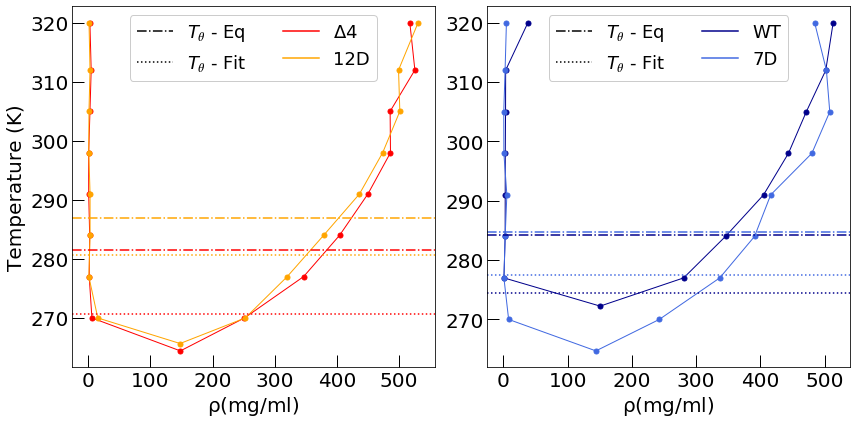

In [12]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

d4_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_d4.txt')
d12_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_d12.txt')

wt_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
d7_slab = np.genfromtxt('/home/adria/data/real_final/08_pd_d7.txt')

axs[0].plot(d4_slab[:,0], d4_slab[:,1], ls='-', marker='o', lw=1, markersize=5, color=C_4, label=L_4)
axs[0].plot(d12_slab[:,0], d12_slab[:,1], ls='-', marker='o', lw=1, markersize=5, color=C_12, label=L_12)
axs[0].legend([Line2D([0], [0], color='black', ls='dashdot'), Line2D([0], [0], color='black', ls='dotted'),
            Line2D([0], [0], color=C_4), Line2D([0], [0], color=C_12)],
           ["$T_{𝜃}$ - Eq","$T_{𝜃}$ - Fit",L_4, L_12], ncol=2, loc='upper center')
# axs[0].legend([Line2D([0], [0], color=C_4), Line2D([0], [0], color=C_12)], [L_4, L_12], ncol=1, loc='upper center')
axs[0].axhline(d12_tc_eq, color=C_12, ls='dashdot')
axs[0].axhline(d4_tc_eq, color=C_4, ls='dashdot')
axs[0].axhline(d12_tc_fit, color=C_12, ls='dotted')
axs[0].axhline(d4_tc_fit, color=C_4, ls='dotted')
axs[0].set_xlabel("$\mathrm{ρ(mg/ml)}$")
axs[0].set_ylabel("Temperature (K)")

axs[1].plot(wt_slab[:,0], wt_slab[:,1], ls='-', marker='o', lw=1, markersize=5, color=C_W, label=L_W)
axs[1].plot(d7_slab[:,0], d7_slab[:,1], ls='-', marker='o', lw=1, markersize=5, color=C_7, label=L_7)
axs[1].legend(loc='lower right')
axs[1].set_xlabel("$\mathrm{ρ(mg/ml)}$")
axs[1].axhline(wt_tc_eq, color=C_W, ls='dashdot')
axs[1].axhline(d7_tc_eq, color=C_7, ls='dashdot')
axs[1].axhline(wt_tc_fit, color=C_W, ls='dotted')
axs[1].axhline(d7_tc_fit, color=C_7, ls='dotted')
axs[1].legend([Line2D([0], [0], color='black', ls='dashdot'), Line2D([0], [0], color='black', ls='dotted'),
            Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_7)],
           ["$T_{𝜃}$ - Eq","$T_{𝜃}$ - Fit",L_W, L_7], ncol=2, loc='upper center')
# axs[1].legend([Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_7)], [L_W, L_7], ncol=1, loc='upper center')

fig.tight_layout()

In [70]:
d = wt_slab[:7,0]
c = wt_slab[7:,0]
temps = wt_slab[7:,1]
r = lmp.LMP(md_dir=None)
r.find_Tc_from_diagram(rho_c=c, rho_d=d, temperatures=temps)
# d,c,temps, wt_slab

PPT1 [150.6183348  272.24476529] PPT2 [-136.75153307  210.37034719    3.71082701]


/home/adria/scripts/md/md/analysis.py:1233: RuntimeWarning: invalid value encountered in power
  return A * (x - Tc_sc) ** beta


(array([[  3.59922594, 320.        ],
        [  3.58461917, 319.97611044],
        [  3.57002695, 319.95222088],
        ...,
        [532.52459809, 319.95222088],
        [532.62526001, 319.97611044],
        [532.7259074 , 320.        ]]), array([150.6183348 , 272.24476529]))

In [26]:
alpha = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/CPEB4_alpha_slab_good')

> Run Completed at 100.00% for CPEB4_alpha. Ran 20000 steps for a total of 3 frames 
> Taking frames every 10 for a total of [1252, 1241, 1078, 1011, 973, 918, 877, 849] to avoid strong correlations


In [27]:
alpha.phase_diagram()

(1252, 144)
Interfaces at  [-27.239162084086534, 27.239162084086534] [-430.66032323539747, 430.66032323539747]
(1241, 144)
Interfaces at  [-0.7259813325452231, 0.7259813325452231] [-336.88546637981, 336.88546637981]
(1078, 144)
Interfaces at  [-1.6871822588693948, 1.6871822588693948] [-180.43635405833436, 180.43635405833436]
(1011, 144)
Interfaces at  [-13.375936416586987, 13.375936416586987] [-72.46877299127726, 72.46877299127726]
(973, 144)
Interfaces at  [-13.380056033006072, 13.380056033006072] [-62.37906158058348, 62.37906158058348]
(918, 144)
Interfaces at  [-10.85438037831566, 10.85438037831566] [-55.70364863248618, 55.70364863248618]
(877, 144)
Interfaces at  [-10.977350973995161, 10.977350973995161] [-54.64124270261529, 54.64124270261529]
(849, 144)
Interfaces at  [-9.409712468112586, 9.409712468112586] [-52.36543966511948, 52.36543966511948]


(array([2.5255446854646353, 4.424172154186119, 23.5821039359476,
        25.433736885988857, 25.176967572228016, 25.60099511801429,
        25.393343743016185, 25.676764380488585], dtype=object),
 array([226.4200936169762, 296.1328255530049, 369.3290579850978,
        400.0102739051642, 444.6456873385363, 470.54414998815236,
        501.72323725223333, 507.7574548240107], dtype=object))

In [31]:
d = [2.5255446854646353, 4.424172154186119, 23.5821039359476,
        25.433736885988857, 25.176967572228016, 25.60099511801429,
        25.393343743016185, 25.676764380488585]
c = [226.4200936169762, 296.1328255530049, 369.3290579850978,
        400.0102739051642, 444.6456873385363, 470.54414998815236,
        501.72323725223333, 507.7574548240107]

In [32]:
alpha.find_Tc_from_diagram(rho_d=np.array(d), rho_c=np.array(c), temperatures=alpha.temperatures)

PPT1 [133.50684946 265.29122746] PPT2 [-161.06591454  226.43807336    4.26044083]


(array([[ 42.69693278, 320.        ],
        [ 42.6538502 , 319.97263193],
        [ 42.61078108, 319.94526386],
        ...,
        [532.6499289 , 319.94526386],
        [532.77273553, 319.97263193],
        [532.8955287 , 320.        ]]), array([133.50684946, 265.29122746]))

In [34]:
rho_c, tc = [133.50684946], [265.29122746]

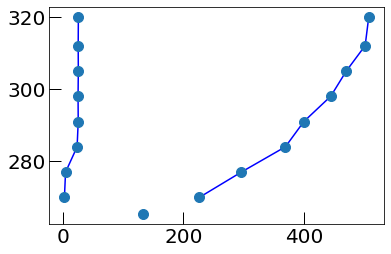

In [35]:
# d12.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d12.temperatures)

temps = alpha.temperatures

saver = np.zeros(shape=(len(d)*2+1,2))
saver[:8,0]=np.flip(d)
saver[:8,1]=np.flip(temps)
saver[8,0]=rho_c[0]
saver[8,1]=tc[0]
saver[9:,0]=c
saver[9:,1]=temps


np.savetxt('/home/adria/data/real_final/08_pd_wta.txt', saver)

plt.plot(d,temps, color='blue')
plt.plot(c,temps, color='blue')
# plt.figure()
# dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
# plt.plot(dcc[:,0],dcc[:,1])
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_wta.txt')
plt.plot(dcc[:,0],dcc[:,1], ls='', marker='o')

In [15]:
d7 = hmd.HMD(md_dir='/home/adria/irb/final/7D_WT_08')

> Taking frames every 10 for a total of [2746, 1531, 2318, 2205, 2070, 1234, 1996, 1995] to avoid strong correlations


In [16]:
d7.phase_diagram()

(2746, 157)
Interfaces at  [-88.50445356610881, 88.50445356610881] [-231.43964655986434, 231.43964655986434]
(1531, 157)
Interfaces at  [-102.99999430242596, 102.99999430242596] [-171.63711583756842, 171.63711583756842]
(2318, 157)
Interfaces at  [-77.49018500407551, 77.49018500407551] [-146.27147901738635, 146.27147901738635]
(2205, 157)
Interfaces at  [-63.96566318281854, 63.96566318281854] [-129.6021787379212, 129.6021787379212]
(2070, 157)
Interfaces at  [-70.33985905599017, 70.33985905599017] [-120.97284064503039, 120.97284064503039]
(1234, 157)
Interfaces at  [-64.5789634437783, 64.5789634437783] [-115.90575330851836, 115.90575330851836]
(1996, 157)
Interfaces at  [-61.17808885642547, 61.17808885642547] [-112.45910712779431, 112.45910712779431]
(1995, 157)
Interfaces at  [-60.472436064803425, 60.472436064803425] [-110.58630426555469, 110.58630426555469]


(array([8.135944792893568, 0.7925665049355801, 2.7176246382871634,
        5.379459647454209, 0.7262943592408067, 0.5640173822418495,
        2.6166281767350923, 4.6891598988164604], dtype=object),
 array([242.69586169592336, 336.8122335231549, 391.03827199929805,
        416.1331717726413, 480.22868718362844, 508.09895035762315,
        502.8801707458992, 484.60718445099934], dtype=object))

In [19]:
d = [8.135944792893568, 0.7925665049355801, 2.7176246382871634,
        5.379459647454209, 0.7262943592408067, 0.5640173822418495,
        2.6166281767350923, 4.6891598988164604]
c = [242.69586169592336, 336.8122335231549, 391.03827199929805,
        416.1331717726413, 480.22868718362844, 508.09895035762315,
        502.8801707458992, 484.60718445099934]

In [20]:
d7.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d7.temperatures)


PPT1 [144.01087455 264.69511426] PPT2 [-87.59268379 210.02053289   5.83581187]


(array([[  8.20169726, 320.        ],
        [  8.1775023 , 319.97233372],
        [  8.15332191, 319.94466745],
        ...,
        [538.61270769, 319.94466745],
        [538.72320264, 319.97233372],
        [538.833683  , 320.        ]]), array([144.01087455, 264.69511426]))

(17, 2)


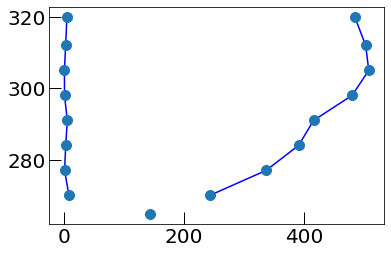

In [24]:
# d12.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d12.temperatures)
rho_c = [144.01087455]
tc = [264.69511426]

temps = d12.temperatures

saver = np.zeros(shape=(len(d)*2+1,2))
print(saver.shape)
saver[:8,0]=np.flip(d)
saver[:8,1]=np.flip(temps)
saver[8,0]=rho_c[0]
saver[8,1]=tc[0]
saver[9:,0]=c
saver[9:,1]=temps


np.savetxt('/home/adria/data/real_final/08_pd_d7.txt', saver)

plt.plot(d,d12.temperatures, color='blue')
plt.plot(c,d12.temperatures, color='blue')
# plt.figure()
# dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_wt.txt')
# plt.plot(dcc[:,0],dcc[:,1])
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_d7.txt')
plt.plot(dcc[:,0],dcc[:,1], ls='', marker='o')

In [3]:
d12 = hmd.HMD(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/SLABS/0.8-csuc/12D_08')

> Taking frames every 10 for a total of [3338, 2986, 2769, 2632, 2475, 2399, 2321, 2288] to avoid strong correlations


In [4]:
d12.phase_diagram()

(3338, 157)
Interfaces at  [-41.75750200266926, 41.75750200266926] [-238.9961750196914, 238.9961750196914]
(2986, 157)
Interfaces at  [-103.89499001457703, 103.89499001457703] [-180.18348109763846, 180.18348109763846]
(2769, 157)
Interfaces at  [-73.5861610578087, 73.5861610578087] [-151.80051586057104, 151.80051586057104]
(2632, 157)
Interfaces at  [-68.38052515076735, 68.38052515076735] [-128.27075336108723, 128.27075336108723]
(2475, 157)
Interfaces at  [-67.88040859667811, 67.88040859667811] [-123.27913666866677, 123.27913666866677]
(2399, 157)
Interfaces at  [-62.60288306025055, 62.60288306025055] [-115.56064209139423, 115.56064209139423]
(2321, 157)
Interfaces at  [-59.89827551147154, 59.89827551147154] [-112.40007184728024, 112.40007184728024]
(2288, 157)
Interfaces at  [-59.87631369463173, 59.87631369463173] [-108.44684219543477, 108.44684219543477]


(array([15.195663615564673, 0.8337206430688398, 2.7945750853852465,
        2.7991444760377915, 0.6943888006908928, 1.033232051419006,
        2.6999975226811888, 1.0987178762495393], dtype=object),
 array([252.57914488870105, 320.06445443032544, 378.693788700334,
        436.3137991831435, 473.70471379303643, 501.2924158447446,
        499.21913097087963, 530.589938460529], dtype=object))

(17, 2)


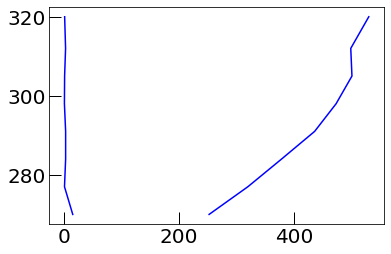

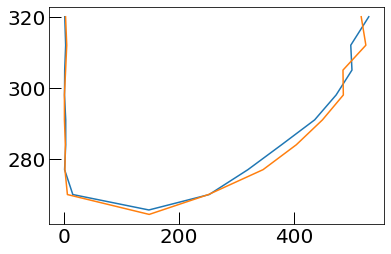

In [14]:
d = [15.195663615564673, 0.8337206430688398, 2.7945750853852465,
        2.7991444760377915, 0.6943888006908928, 1.033232051419006,
        2.6999975226811888, 1.0987178762495393]
c = [252.57914488870105, 320.06445443032544, 378.693788700334,
        436.3137991831435, 473.70471379303643, 501.2924158447446,
        499.21913097087963, 530.589938460529]
# d12.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=d12.temperatures)
rho_c = [147.65995817]
tc = [265.66659614]

temps = d12.temperatures

saver = np.zeros(shape=(len(d)*2+1,2))
print(saver.shape)
saver[:8,0]=np.flip(d)
saver[:8,1]=np.flip(temps)
saver[8,0]=rho_c[0]
saver[8,1]=tc[0]
saver[9:,0]=c
saver[9:,1]=temps


np.savetxt('/home/adria/data/real_final/08_pd_d12.txt', saver)

plt.plot(d,d12.temperatures, color='blue')
plt.plot(c,d12.temperatures, color='blue')
plt.figure()
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_d12.txt')
plt.plot(dcc[:,0],dcc[:,1])
dcc = np.genfromtxt('/home/adria/data/real_final/08_pd_d4.txt')
plt.plot(dcc[:,0],dcc[:,1])

(17, 2)
[[  5.7471009  320.        ]
 [  1.43075382 312.        ]
 [  2.17254373 305.        ]
 [  0.57476623 298.        ]
 [  0.53847396 291.        ]
 [  2.62092004 284.        ]
 [  4.57256612 277.        ]
 [  2.52610358 270.        ]
 [148.15776184 264.41558979]
 [251.31271993 270.        ]
 [346.44267726 277.        ]
 [404.36145272 284.        ]
 [449.91648792 291.        ]
 [486.25949636 298.        ]
 [485.66376905 305.        ]
 [525.51355507 312.        ]
 [517.39728456 320.        ]]
PPT1 [148.15776184 264.41558979] PPT2 [-71.29988627 211.71371273   7.53534476]


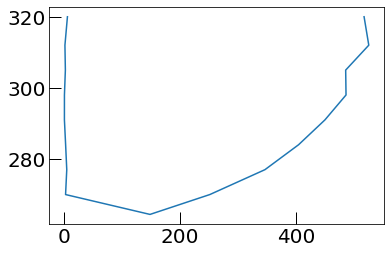

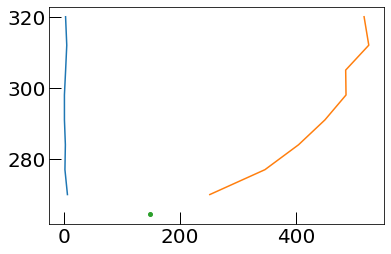

In [42]:
# d = [5.747100896680286, 1.430753822293296, 2.1725437321726737,
#         0.5747662251584651, 0.538473955986617, 2.6209200403903963,
#         4.572566121260307, 2.5261035780443404]
# c = [251.31271992712, 346.442677263773, 404.3614527214531,
#         449.9164879205547, 486.25949636227546, 485.66376905051527,
#         525.5135550686858, 517.3972845584258]
# rho_c = [148.15776184]
# tc = [264.41558979]

# temps = s.temperatures

# saver = np.zeros(shape=(len(d)*2+1,2))
# print(saver.shape)
# saver[:8,0]=np.flip(d)
# saver[:8,1]=np.flip(temps)
# saver[8,0]=rho_c[0]
# saver[8,1]=tc[0]
# saver[9:,0]=c
# saver[9:,1]=temps

# print(saver)

# np.savetxt('/home/adria/data/real_final/08_pd_d4.txt', saver)
# dcc = np.genfromtxt('147.65995817 265.66659614')
# plt.figure()
# plt.plot(dcc[:,0],dcc[:,1])

# plt.figure()
# plt.plot(d,temps)
# plt.plot(c,temps)
# s.find_Tc_from_diagram(rho_c=np.array(c), rho_d=np.array(d), temperatures=s.temperatures)
# plt.plot(148.15776184, 264.41558979, marker='o', markersize=4)

In [21]:
s = np.arange(0,18)
s[:7]

array([0, 1, 2, 3, 4, 5, 6])

In [8]:
s = hmd.HMD(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/SLABS/0.8-csuc/WT',every=1)

(30617, 157)
(26963, 157)
(25007, 157)
(24434, 157)


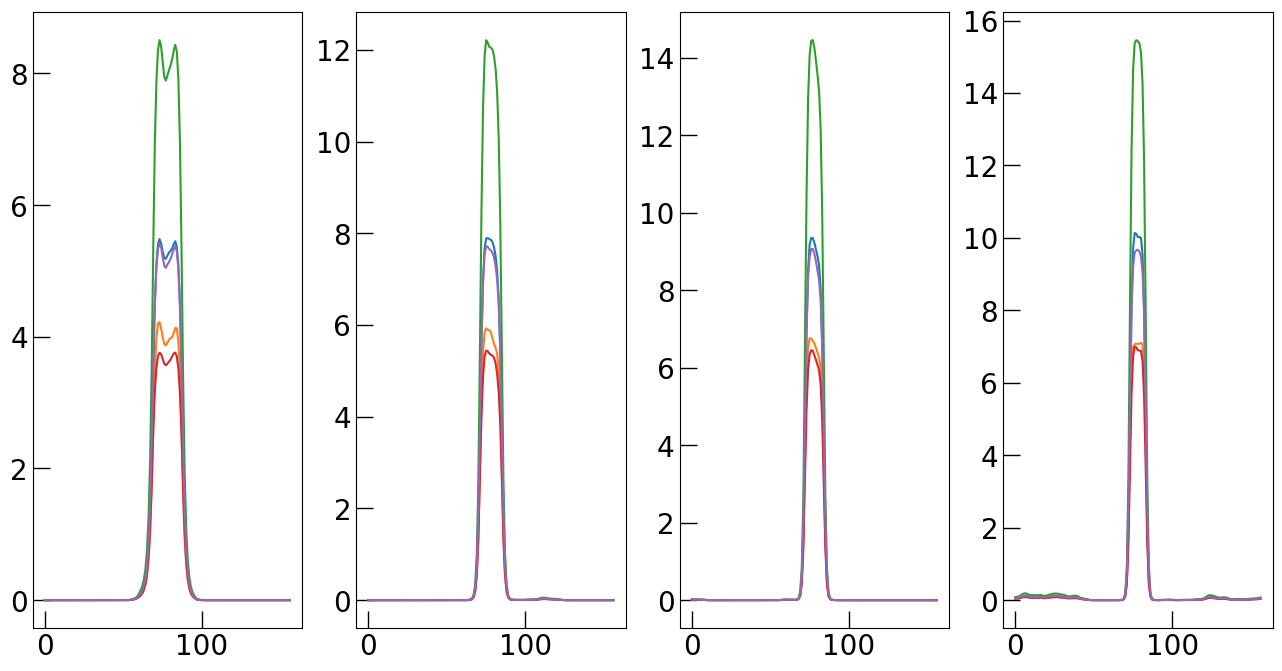

In [9]:
fig, axs = plt.subplots(1,4, figsize=(16,8))
for j,T in enumerate([1,3,5,7]):
    xa, slab_bins = s.density_profile_by_type(T=T)    
    for i in range(5):
        axs[j].plot(xa[i,:,:].mean(axis=0))

In [14]:
z, rho_z, xa, caa, pa, shifts = s.density_profile(T=0)

(33197, 157)


In [15]:
rho_z.shape

(33197, 157)

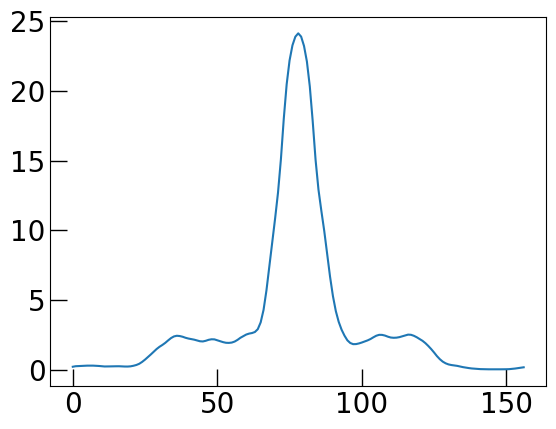

In [16]:
plt.plot(rho_z.mean(axis=0))